# Corpus analysis
We will take a look at the provided corpora.
In particular, we will analyse the label distribution of the pairs and the number of tokens per sentence.
As a first step we will read in the corpora:

In [1]:
import sys
sys.path.append("../")
import os
import pandas as pd
import numpy as np
from tlbiore.data import corpus_processor, utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aimed_train = '../data/raw/AIMed-train.xml'
bioinfer_train = '../data/raw/BioInfer-train.xml'

# Testdateien, für die wir die Predictions machen
aimed_test = '../data/raw/AIMed-test.xml'
bioinfer_test = '../data/raw/BioInfer-test.xml'

data_path = '../data/ppi_hu/'

In [3]:
aimed_train = corpus_processor.process_corpora(aimed_train)
aimed_test = corpus_processor.process_corpora(aimed_test)

bioinfer_train = corpus_processor.process_corpora(bioinfer_train)
bioinfer_test = corpus_processor.process_corpora(bioinfer_test)

## Label distribution in the data
No we will look at the label distribution for each corpus:

In [4]:
aimed_train_pairs = aimed_train.get_examples()
bioinfer_train_pairs = bioinfer_train.get_examples()

In [5]:
aimed_train_pairs.label.value_counts()

False    3880
True      800
Name: label, dtype: int64

In [6]:
bioinfer_train_pairs.label.value_counts()

False    5934
True     2109
Name: label, dtype: int64

## Sequence lengths in the data
First, we will load the sentences.

In [7]:
def extract_texts(sentences):
    return list(map(lambda x: x.text, sentences))

In [8]:
aimed_train_sentences = extract_texts(aimed_train.get_sentences())
aimed_test_sentences = extract_texts(aimed_test.get_sentences())

bioinfer_train_sentences = extract_texts(bioinfer_train.get_sentences())
bioinfer_test_sentences = extract_texts(bioinfer_test.get_sentences())

Second, we will load our BertTokenizer. (We could swap out `bert-base-cased` with BioBERT or SciBERT.)

In [9]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

Now we can tokenize our sentences and display the sequence lengths after tokenization. We add +1 to account for the CLS token that will be added in the BERT encoding workflow. (For some of the approaches we would actually have to account for the added positional markers, as well.)

In [10]:
aimed_train_sent_lengths = np.array([len(tokenizer.tokenize(x))+1 for x in aimed_train_sentences])
print("The longest sequence in AIMed Train has", aimed_train_sent_lengths.max(), "tokens.")

aimed_test_sent_lengths = np.array([len(tokenizer.tokenize(x))+1 for x in aimed_test_sentences])
print("The longest sequence in AIMed Test has", aimed_test_sent_lengths.max(), "tokens.") 
# print(aimed_test_sentences[aimed_test_sent_lengths.argmax()])

The longest sequence in AIMed Train has 277 tokens.
The longest sequence in AIMed Test has 172 tokens.


In [11]:
bioinfer_train_sent_lengths = np.array([len(tokenizer.tokenize(x))+1 for x in bioinfer_train_sentences])
print("The longest sequence in BioInfer Train has", bioinfer_train_sent_lengths.max(), "tokens.")

bioinfer_test_sent_lengths = np.array([len(tokenizer.tokenize(x))+1 for x in bioinfer_test_sentences])
print("The longest sequence in BioInfer Test has", bioinfer_test_sent_lengths.max(), "tokens.")

The longest sequence in BioInfer Train has 173 tokens.
The longest sequence in BioInfer Test has 166 tokens.


As a plot, because why not:

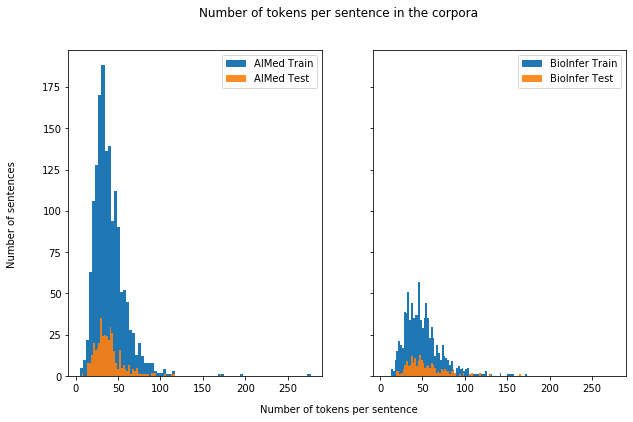

In [24]:
num_bins = 75
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(10,6))
ax1.hist(aimed_train_sent_lengths, label='AIMed Train', bins=num_bins)
ax1.hist(aimed_test_sent_lengths, label='AIMed Test', bins=num_bins, alpha=0.9)

ax2.hist(bioinfer_train_sent_lengths, label='BioInfer Train', bins=num_bins)
ax2.hist(bioinfer_test_sent_lengths, label='BioInfer Test', bins=num_bins, alpha=0.9)

fig.text(0.5, 0.04, 'Number of tokens per sentence', ha='center')
fig.text(0.04, 0.5, 'Number of sentences', va='center', rotation='vertical')

ax1.legend()
ax2.legend()

fig.suptitle("Number of tokens per sentence in the corpora")

fig.savefig('SequenceLengths.png', dpi=300)

As the longest observed sequence had length 277 (already accounting for the CLS token), we chose 286 as our maximum sequence length to allow for special positional tokens, etc.